In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import re
import pickle

import nltk 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, mean_squared_error,mean_absolute_error, roc_auc_score, log_loss
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
import xgboost as xgb

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\RAHUL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RAHUL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\RAHUL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
true_data = pd.read_csv("News_Dataset/True.csv")
true_data.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [3]:
fake_data = pd.read_csv("News_Dataset/Fake.csv")
fake_data.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
true_data["label"] = 1
fake_data["label"] = 0

In [5]:
true_data.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [6]:
data = pd.concat([true_data, fake_data], axis = 0)

In [7]:
data

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


C:\Users\RAHUL\AppData\Local\Temp\ipykernel_10232\1723054089.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(),rotation=90)


[Text(0, 0, 'politicsNews'),
 Text(1, 0, 'worldnews'),
 Text(2, 0, 'News'),
 Text(3, 0, 'politics'),
 Text(4, 0, 'left-news'),
 Text(5, 0, 'Government News'),
 Text(6, 0, 'US_News'),
 Text(7, 0, 'Middle-east')]

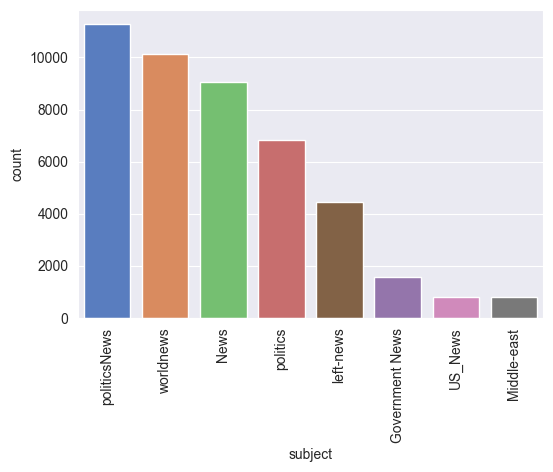

In [8]:
plt.figure(figsize = (6,4))
sns.set_style(style = "darkgrid")
chart = sns.countplot(x = "subject", data = data, hue="subject" , palette="muted", order = data['subject'].value_counts().index)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

In [9]:
data["text"] = data["title"] + " " + data["text"]

In [10]:
# free-up memory for unwanted columns
del data["title"]
del data["date"]
del data["subject"]

In [11]:
data.head()

,text,label
0,"As U.S. budget fight looms, Republicans flip t...",1
1,U.S. military to accept transgender recruits o...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,1
3,FBI Russia probe helped by Australian diplomat...,1
4,Trump wants Postal Service to charge 'much mor...,1


In [12]:
data.shape

(44898, 2)

In [13]:
# resuffling
data = data.sample(frac = 1).reset_index(drop=True)
data.head()

,text,label
0,Exclusive: Displaced Rohingya in camps face ai...,1
1,South Korea says delay in military drills aime...,1
2,Trump employee apologizes for Melania speech '...,1
3,Trump Awards Woman The Medal Of Valor Then Ki...,0
4,Egyptian Muslim leader rejects meeting with U....,1


<Axes: xlabel='label', ylabel='count'>

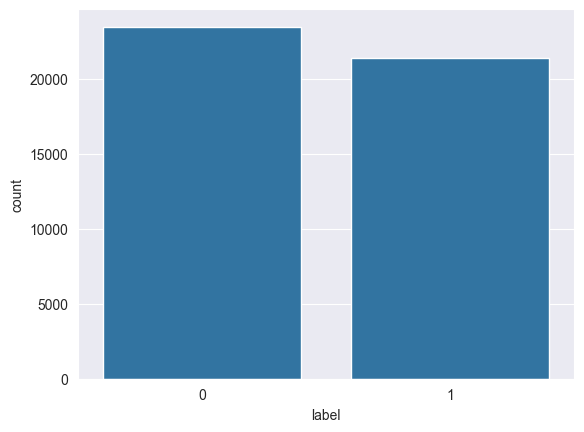

In [14]:
sns.countplot(data = data, x = "label")

In [15]:
def preprocess_text(text):
    # converting text to lowercase
    text = text.lower()

    # remove numbers
    text = re.sub(r'\d+', "", text)

    # remove punctuation
    text = re.sub(r'[^\w\s]', "", text)

    # tokenize text into individual words
    tokens = word_tokenize(text, language = "english", preserve_line = True)

    # remove stopwords
    custom_stopwords = stopwords.words("english")
    tokens = [word for word in tokens if word not in custom_stopwords]

    # lemmatization
    lemmatizer = WordNetLemmatizer()
    text = " ".join(lemmatizer.lemmatize(word) for word in tokens)

    return text

In [16]:
data["text"] = data["text"].apply(preprocess_text)

In [17]:
data.head()

,text,label
0,exclusive displaced rohingya camp face aid cri...,1
1,south korea say delay military drill aimed ens...,1
2,trump employee apologizes melania speech chaos...,1
3,trump award woman medal valor kiss thursday do...,0
4,egyptian muslim leader reject meeting u penny ...,1


In [18]:
X_train, X_test, y_train, y_test = train_test_split(data["text"], data["label"], test_size = 0.3, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((31428,), (13470,), (31428,), (13470,))

In [19]:
vectorization = TfidfVectorizer()
X_train = vectorization.fit_transform(X_train)
X_test = vectorization.transform(X_test)

In [20]:
# making empty dataframes to store values of different metrics
train_metrics_df = pd.DataFrame(columns=["Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC"], index=[])
test_metrics_df = pd.DataFrame(columns=["Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC"], index=[])

In [21]:
def evaluate_model(model, model_name, X_train, y_train, X_test, y_test):

    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    def measure_error(y_true, y_pred, label, X_data):
        return pd.Series({"Accuracy": accuracy_score(y_true, y_pred),
                            "Precision": precision_score(y_true, y_pred),
                            "Recall": recall_score(y_true, y_pred),
                            "F1 Score": f1_score(y_true, y_pred),
                            "ROC AUC": roc_auc_score(y_true, y_pred)},
                            name=label)

    # store metrics for both training and testing data in dataframes
    train_metrics = measure_error(y_train, y_train_pred, "Train", X_train)
    test_metrics = measure_error(y_test, y_test_pred, "Test", X_test)
    train_metrics_df.loc[model_name] = train_metrics
    test_metrics_df.loc[model_name] = test_metrics

    # plot confusion matrix 
    cm_train = confusion_matrix(y_train, y_train_pred)
    cm_test = confusion_matrix(y_test, y_test_pred)
    cm_display_train = ConfusionMatrixDisplay(confusion_matrix = cm_train, display_labels = [False, True])
    cm_display_test = ConfusionMatrixDisplay(confusion_matrix = cm_test, display_labels = [False, True])

    # print the results
    print("Training Data:")
    print(train_metrics)
    cm_display_train.plot()
    plt.grid(False)
    plt.show()

    print("Test Data:")
    print(test_metrics)
    cm_display_test.plot()
    plt.grid(False)
    plt.show()

    return model

Training Data:
Accuracy     1.0
Precision    1.0
Recall       1.0
F1 Score     1.0
ROC AUC      1.0
Name: Train, dtype: float64


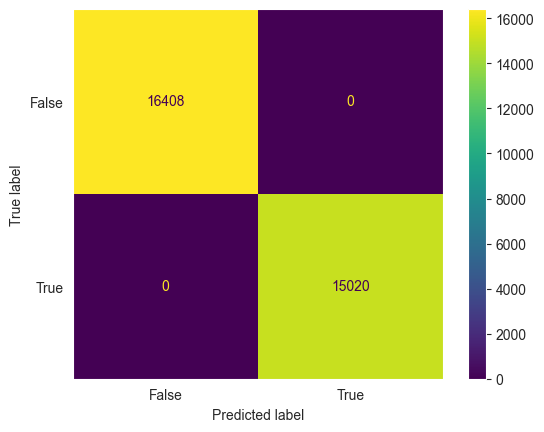

Test Data:
Accuracy     0.996140
Precision    0.995471
Recall       0.996405
F1 Score     0.995938
ROC AUC      0.996152
Name: Test, dtype: float64


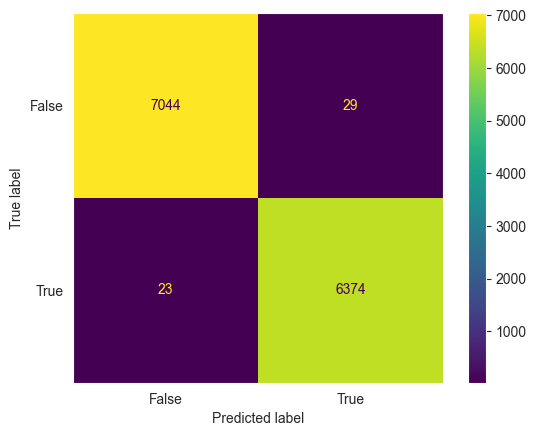

DecisionTreeClassifier()

In [22]:
model = DecisionTreeClassifier()
evaluate_model(model, "Decision Tree", X_train, y_train, X_test, y_test)

Training Data:
Accuracy     1.0
Precision    1.0
Recall       1.0
F1 Score     1.0
ROC AUC      1.0
Name: Train, dtype: float64


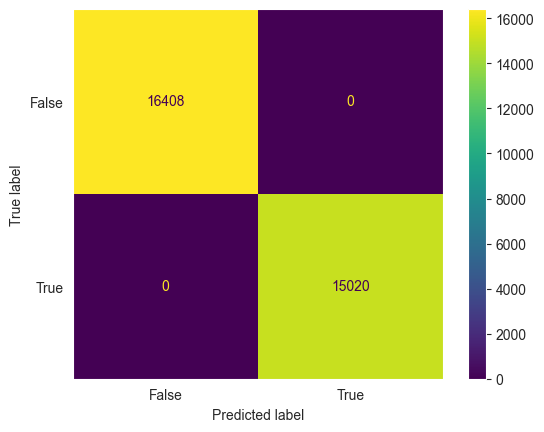

Test Data:
Accuracy     0.987528
Precision    0.986565
Recall       0.987181
F1 Score     0.986873
ROC AUC      0.987511
Name: Test, dtype: float64


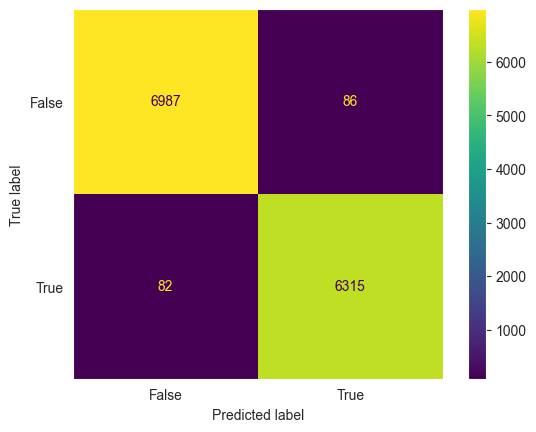

RandomForestClassifier()

In [23]:
model = RandomForestClassifier()
evaluate_model(model,"Random Forest", X_train, y_train, X_test, y_test)

Training Data:
Accuracy     0.997073
Precision    0.995618
Recall       0.998269
F1 Score     0.996941
ROC AUC      0.997123
Name: Train, dtype: float64


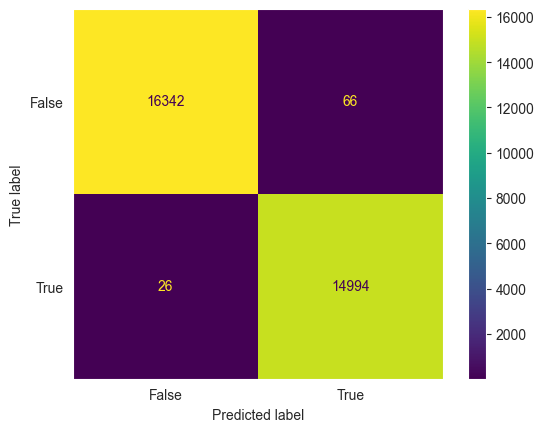

Test Data:
Accuracy     0.995397
Precision    0.992843
Recall       0.997499
F1 Score     0.995165
ROC AUC      0.995498
Name: Test, dtype: float64


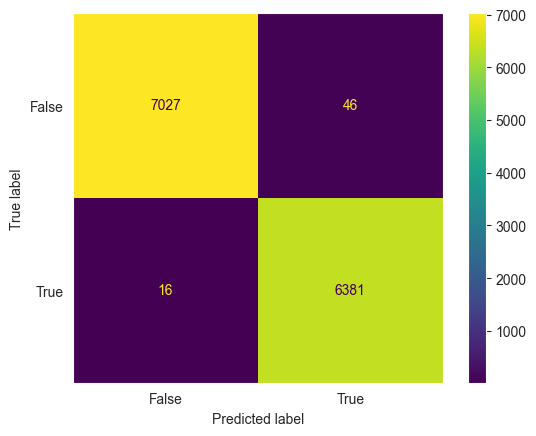

GradientBoostingClassifier()

In [24]:
model = GradientBoostingClassifier()
evaluate_model(model, "Gradient Boosting", X_train, y_train, X_test, y_test)

Training Data:
Accuracy     1.0
Precision    1.0
Recall       1.0
F1 Score     1.0
ROC AUC      1.0
Name: Train, dtype: float64


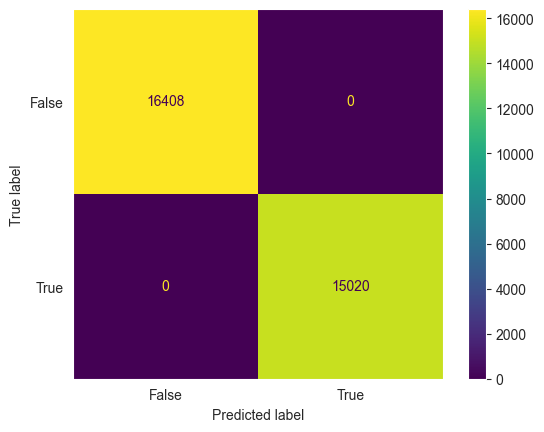

Test Data:
Accuracy     0.993690
Precision    0.991895
Recall       0.994841
F1 Score     0.993366
ROC AUC      0.993745
Name: Test, dtype: float64


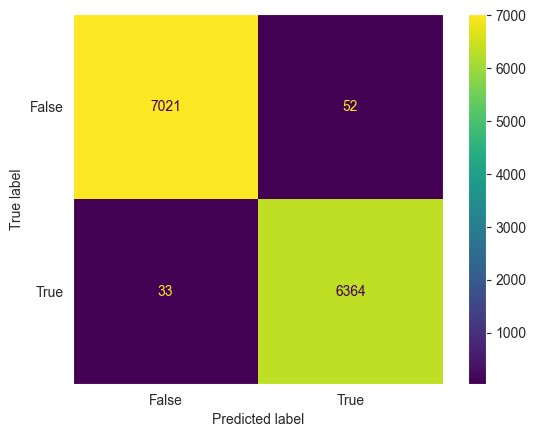

PassiveAggressiveClassifier()

In [25]:
model = PassiveAggressiveClassifier()
evaluate_model(model, "Passive Aggressive Classifier", X_train, y_train, X_test, y_test)

Training Data:
Accuracy     0.999968
Precision    1.000000
Recall       0.999933
F1 Score     0.999967
ROC AUC      0.999967
Name: Train, dtype: float64


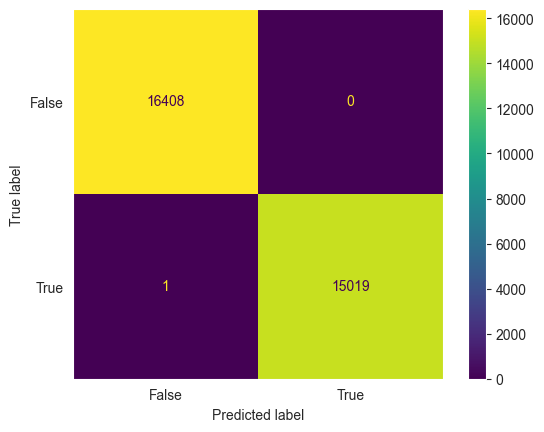

Test Data:
Accuracy     0.997699
Precision    0.996413
Recall       0.998749
F1 Score     0.997580
ROC AUC      0.997749
Name: Test, dtype: float64


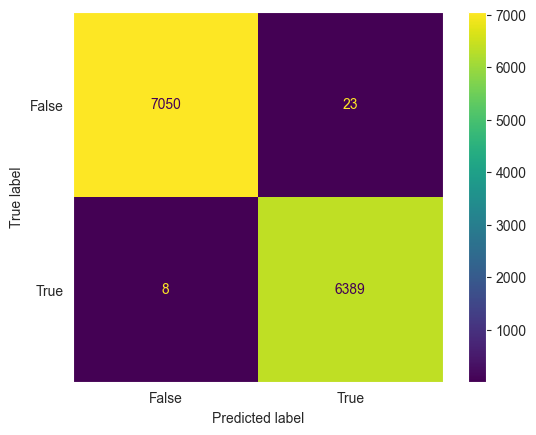

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [26]:
model = xgb.XGBClassifier()
evaluate_model(model, "XGBoost", X_train, y_train, X_test, y_test)

Training Data:
Accuracy     0.992141
Precision    0.990634
Recall       0.992943
F1 Score     0.991787
ROC AUC      0.992175
Name: Train, dtype: float64


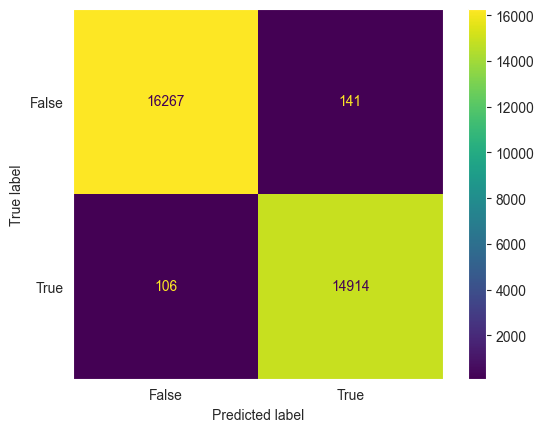

Test Data:
Accuracy     0.986488
Precision    0.983808
Recall       0.987807
F1 Score     0.985803
ROC AUC      0.986551
Name: Test, dtype: float64


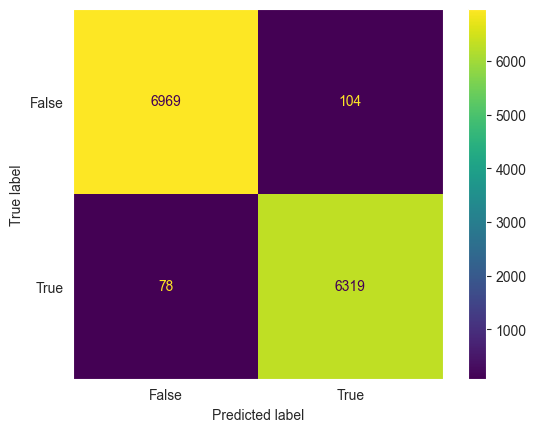

LogisticRegression()

In [27]:
model = LogisticRegression().fit(X_train, y_train)
evaluate_model(model, "Logistic Regression", X_train, y_train, X_test, y_test)

In [28]:
train_metrics_df

,Accuracy,Precision,Recall,F1 Score,ROC AUC
Decision Tree,1.000000,1.000000,1.000000,1.000000,1.000000
Random Forest,1.000000,1.000000,1.000000,1.000000,1.000000
Gradient Boosting,0.997073,0.995618,0.998269,0.996941,0.997123
Passive Aggressive Classifier,1.000000,1.000000,1.000000,1.000000,1.000000
XGBoost,0.999968,1.000000,0.999933,0.999967,0.999967
Logistic Regression,0.992141,0.990634,0.992943,0.991787,0.992175


In [29]:
test_metrics_df

,Accuracy,Precision,Recall,F1 Score,ROC AUC
Decision Tree,0.996140,0.995471,0.996405,0.995938,0.996152
Random Forest,0.987528,0.986565,0.987181,0.986873,0.987511
Gradient Boosting,0.995397,0.992843,0.997499,0.995165,0.995498
Passive Aggressive Classifier,0.993690,0.991895,0.994841,0.993366,0.993745
XGBoost,0.997699,0.996413,0.998749,0.997580,0.997749
Logistic Regression,0.986488,0.983808,0.987807,0.985803,0.986551


Give input and check if given news is real or fake. 

Firstly i will input false news.

In [31]:
news = input("Enter the news: ")
news_vec = vectorization.transform([news])
print(news)

Spending plan to prevent a government shutdown includes “a pay increase for members of Congress from $174,000 to $243,000 per year.”Business executives Elon Musk and Vivek Ramaswamy, co-leaders of the Department of Government Efficiency, an incoming advisory committee, came out with a host of reasons that Congress should ditch a plan to fund the government and avoid a government shutdown by Dec. 21. Their concerns made it to President-elect Donald Trump, who then announced his opposition to the continuing resolution, making its passage unlikely.  On X, Musk — who declared the bill "dead" — urged lawmakers to vote against the continuing resolution. Similarly, Ramaswamy said he read the approximately 1,500-page bill and described it as "full of excessive spending" and said it "should fail."   The committee, which calls itself DOGE for short, on X also criticized the continuing resolution for, among other things, purportedly including "a pay increase for members of Congress from $174,000 

In [32]:
print("Real") if (model.predict(news_vec) == 1) else print("Fake")

Fake


This time i will input real news.

In [33]:
news = input("Enter the news: ")
news_vec = vectorization.transform([news])
print(news)

Government shutdowns in 2013 and 2018 “cost our economy billions of dollars each.”As Congress headed toward a potential pre-Christmas shutdown, some lawmakers warned that closing the government would not save taxpayer money.  Rep. Sara Jacobs, D-Calif., criticized a push for mass cuts in federal spending by the Department of Government Efficiency, an incoming presidential advisory committee run by entrepreneurs Elon Musk and Vivek Ramaswamy. Musk urged lawmakers to vote against a 1,500-plus page "continuing resolution" that would keep the government open. House Speaker Mike Johnson, R-La., had negotiated the plan with House Democrats, whose votes he needed to pass it.  Ramaswamy described the bill as "full of excessive spending" and said it "should fail." President-elect Donald Trump and JD Vance, the vice president-elect, rejected the spending deal that would fund the government through mid-March.  "Maybe someone should tell DOGE that government shutdowns aren’t efficient or cost effe

In [34]:
print("Real") if (model.predict(news_vec) == 1) else print("Fake")

Real
